In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from dipole import model

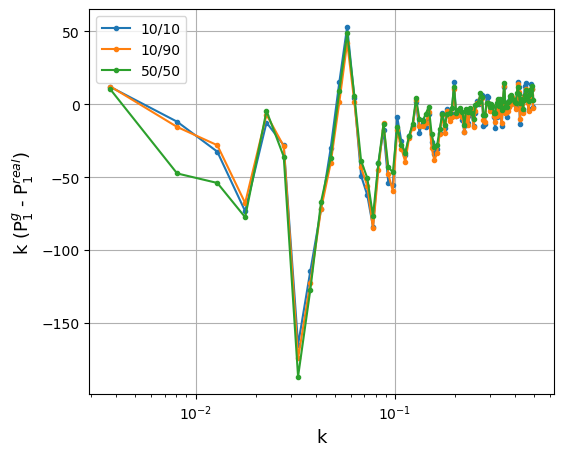

In [3]:
cuts_b = [10,10,50]
cuts_f = [10,90,50]

plt.figure(figsize=(6,5))
    
for cut_b, cut_f in zip(cuts_b, cuts_f):
    
    data = np.loadtxt(f'/global/homes/j/jpiat/data/Pk1_b{cut_b}_f{cut_f}.dat')
    data_real = np.loadtxt(f'/global/homes/j/jpiat/data/Pk1_real_b{cut_b}_f{cut_f}.dat')
    
    k = data[:,0]
    pk1 = data[:,1]
    pk1_real = data_real[:,1]
    
    plt.plot(k,k*(pk1-pk1_real),marker='.',label=f'{cut_b}/{cut_f}')
    plt.ylabel(r'k (P$^g_1$ - P$^{real}_1$)',fontsize=13)
    plt.xlabel('k', fontsize=13)
    plt.xscale('log')
    plt.grid()
    plt.legend();

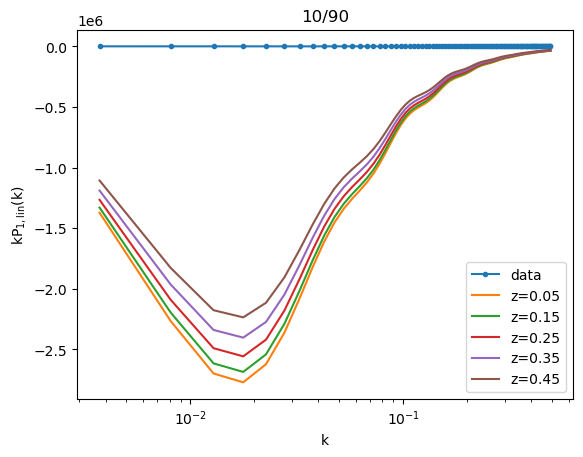

In [18]:
cut_b = 10
cut_f = 90

data = np.loadtxt(f'/global/homes/j/jpiat/data/Pk1_b{cut_b}_f{cut_f}.dat')
    
k = data[:,0]
s = [0.980,0.413]
b = [1.28,1.05]

k = data[:,0]
pk1_data = data[:,1]

dz = 0.1
z_bins = np.arange(0,0.5+dz,dz)
z = z_bins[:-1]+dz/2

plt.figure()
plt.title(f'{cut_b}/{cut_f}')
plt.xlabel('k')
plt.ylabel(r'kP$\rm _{1,lin}$(k)')
plt.xscale('log')
plt.plot(k,k*pk1_data,marker='.',label='data')

for zi in z:
    
    pk1_model = model(k,zi,s,b)
    
    plt.plot(k, k*pk1_model, label='z={:.2f}'.format(zi))
    
plt.legend() 
plt.show()